<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:60px; font-weight:bold;">Exploratory Data Analysis</div>
</div>
<br>
<p>Tijdens de testdagen op vrijdag is er ook de mogelijkheid om data op te nemen van de kart. In dit bestand wordt er dieper in de data gedoken en zal er worden gekeken hoe de opgenomen data in elkaar steekt. Het bestand is zo in elkaar gezet dat elk bestand die van de kart is verkregen ingelezen en verwerkt kan worden. Daarom staan er bij sommige onderdelen erg algemene teksten, deze geven dan uitleg over de verschillende mogelijkheden van de data.<p>

-- Inhoudsopgave? --

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inladen van libaries en data</div>
</div>
<br>
<p>Om de data te kunnen onderzoeken is het belangrijk dat alle nodige libaries ervoor worden geinstalleerd. Naast de standaard libaries is er ook een `.py` bestand aanwezig in de GitHug, in dit bestand staan diverse functies die zijn ontwikkelt voor gebruik in het notebook. Deze zijn vervolgens in een `.py` bestand gezet om te zorgen dat ze voor elk bestand beschikbaar worden.<p>

In [3]:
from functies.eda import *
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Aan de hand van deze libaries zou het mogelijk moeten zijn om de bestanden in te laden. De bestanden die worden opgenomen met de kart zijn te vinden op een externe harde schrijf. Om het inladen van de huidige en toekomstige data makkelijker te maken, is er een functie aangemaakt.

In [2]:
## df, front, left, right = data_loader("D:/recording 15-03")

Omdat de bovenste code niet werkt met de grote hoeveelheid aan afbeeldingen zal de data zelfstandig worden ingeladen.

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inladen en bekijken van de tabel data</div>
</div>
<br>
Om de data toch goed te kunnen bekijken is het nodig om alle bestanden apart in te laden. Daardoor zal eerst het csv bestand worden bekeken. Om dit succesvol te doen is eerst het csv bestand bekeken, om uit te vinden welke seperator er is gebruikt om de data te scheiden.

In [16]:
folder = "/Recordings/recording 10-05-2024 15-21-55"
df = pd.read_csv(f"D:/{folder}/recording.csv", sep="|")
# df = pd.read_csv(f"recording.csv", sep="|")

Met het dataframe kan gekeken worden welke data op elk opgenomen timestamp is gedetecteerd. Om hierover wat snelle, simpele informatie te winnen zullen de `.info()`, `.describe()` en `.head()` methoden worden gebruikt. Doordat er in elke opname verschillen kunnen zijn qua opgenomen data, is het belangrijk om te weten wat de verschillende waarden van de data in kunnen houden. Alle kolommen staan daarom in de onderstaande tabel uitgelegd.

|Kolom          |Mogelijke Waarden  |Uitleg
|--             |--                 |--
|Timestamp      |1710498235.9130464 |De timestamp waarop de afbeelding is genomen. De timestamp met '.png' extensie is de bijbehorende afbeelding.
|Steering       |Tussen -1 en 1     |Negatief geeft een stuurrichting naar links aan, terwijl positief een stuurrichting naar rechts aangeeft.
|SteeringSpeed  |49920              |De reden van deze waarden is niet erg duidelijk, aangezien deze overal gelijk is.
|Throttle       |Tussen 0 en 1      |Het percentage gas dat wordt gegeven. 0 is 0%, 1 is 100%.
|Brake          |Tussen 0 en 1      |Het kracht van de bruiking van de rem in percentages. 0 is 0%, 1 is 100%.
|SteeringSensor |Tussen -800 en 800 |De stuurhoek.
|SpeedSensor    |Tussen 0 en 1000   |De snelheid van de kart, opgenomen in Hm/s.

In [17]:
# Tonen van basis informatie in DataFrame
print("Basis informatie DataFrame:")
display(df.info())

# Opsomming van statistieken
print("\nOpsomming van statistieken:")
display(df.describe())

# Eerste vijf rijen tonen
print("\nEerste rijen in DataFrame:")
display(df.head())

Basis informatie DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7061 entries, 0 to 7060
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       7060 non-null   float64
 1   Steering        7060 non-null   float64
 2   SteeringSpeed   7060 non-null   float64
 3   Throttle        7060 non-null   float64
 4   Brake           7060 non-null   float64
 5   SteeringSensor  7060 non-null   float64
 6   SpeedSensor     7060 non-null   float64
dtypes: float64(7)
memory usage: 386.3 KB


None


Opsomming van statistieken:


,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor,SpeedSensor
count,7.060000e+03,7060.000000,7060.0,7060.000000,7060.000000,7060.000000,7060.000000
mean,1.715347e+09,-0.059326,49920.0,0.473336,0.035812,-60.474788,71.366856
std,6.810719e+01,0.431856,0.0,0.394259,0.183690,321.209309,39.441328
min,1.715347e+09,-1.000000,49920.0,0.000000,0.000000,-880.000000,0.000000
25%,1.715347e+09,0.000000,49920.0,0.000000,0.000000,-12.000000,40.000000
50%,1.715347e+09,0.000000,49920.0,0.530000,0.000000,5.000000,90.000000
75%,1.715347e+09,0.000000,49920.0,0.830000,0.000000,14.000000,100.000000
max,1.715348e+09,0.999970,49920.0,1.000000,1.000000,886.000000,180.000000



Eerste rijen in DataFrame:


,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor,SpeedSensor
0,1.715347e+09,0.0,49920.0,0.0,0.0,2.0,0.0
1,1.715347e+09,0.0,49920.0,0.0,0.0,2.0,0.0
2,1.715347e+09,0.0,49920.0,0.0,0.0,2.0,0.0
3,1.715347e+09,0.0,49920.0,0.0,0.0,2.0,0.0
4,1.715347e+09,0.0,49920.0,0.0,0.0,2.0,0.0


Nu zal er via grafieken worden gekeken wat de data aan het doen is tijdens het rijden. Indien het ingeladen dataframe te groot is of te veel data bevat, kan de `data_selection()` functie worden toegepast om met 2 integers aan te geven welke periode getoont moet worden.

In [6]:
# Gebruiken van de data_selection functie indien nodig
eda = data_selection(df, 1712916900, 1712917020)

Om vervolgens de grafieken modulair (bij het toevoegen van extra kolommen over tijd bijvoorbeeld) en overzichtelijk neer te zetten is er de `lijngrafieken()` functie aangemaakt.

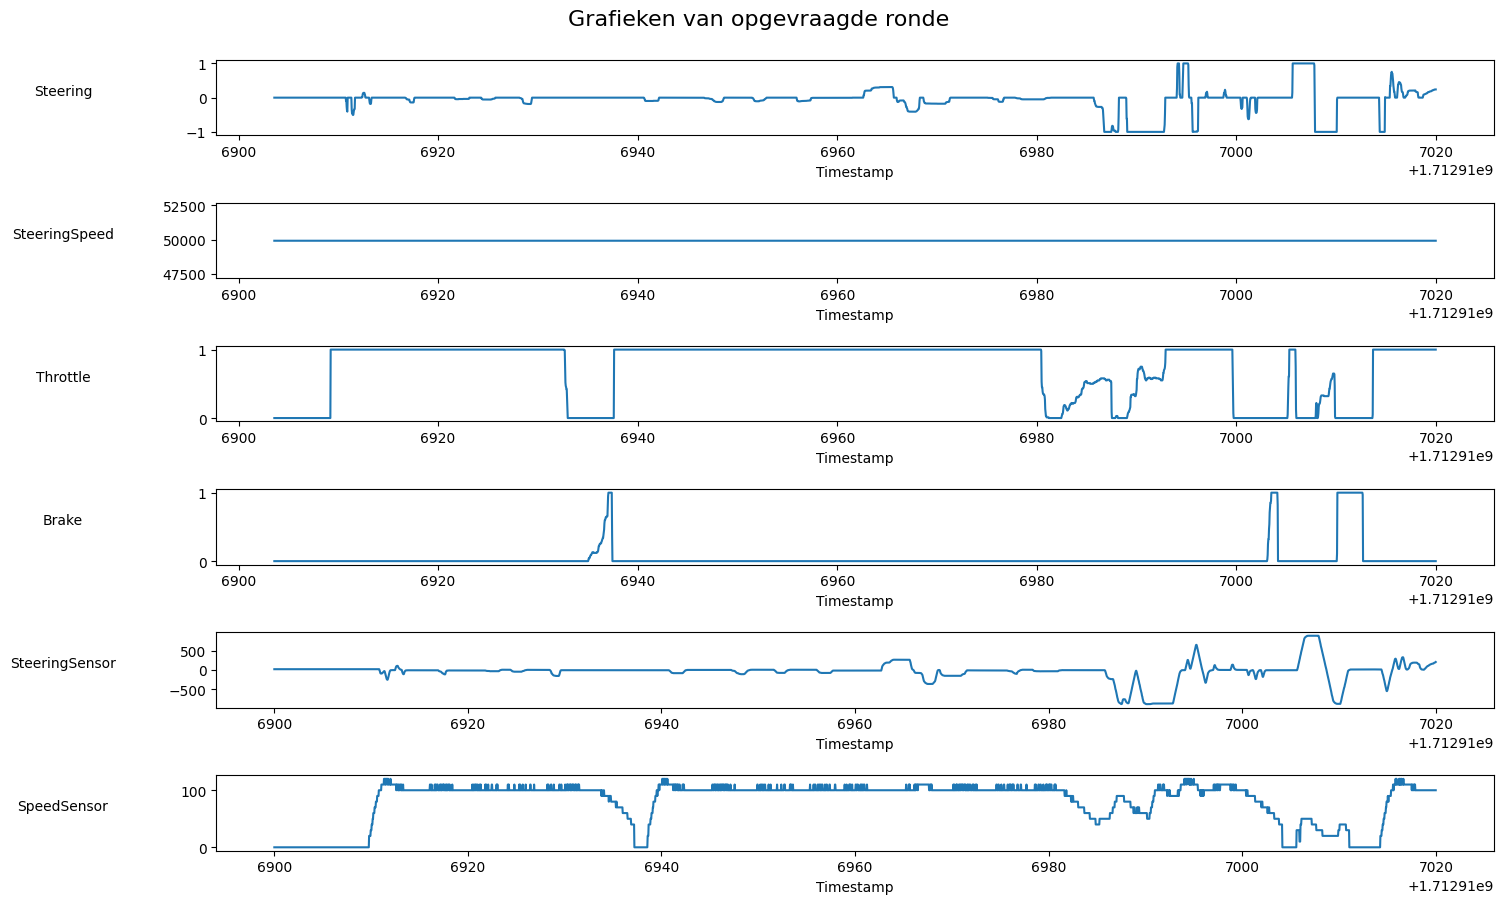

In [7]:
# Toepassen van de lijngrafieken functie
lijngrafieken(eda)

De grafieken tonen ons een duidelijk overzicht van wanneer er in de verschillende ronden is geremt, wanneer er vol gas is gegeven en wanneer er welke kant op wordt gestuurd. Door dit bestand later te runnen met data van een geprogrameerde kart (in plaats van zelf rijden), kan er meteen in een overzicht worden gezien of de kart stabiel aan het sturen is. Op deze manier kan er eventueel gezorgd worden voor manipulatie van train data, om te zorgen dat het model stabieler zal worden in bijvoorbeeld sturen.

Ook is er een functie genaamd `scaled_vergelijking()` beschikbaar. Deze kan worden gebruikt om twee kolommen gemakkelijk te vergelijken, door ze eerst tussen een schaal van -1 en 1 te zetten.

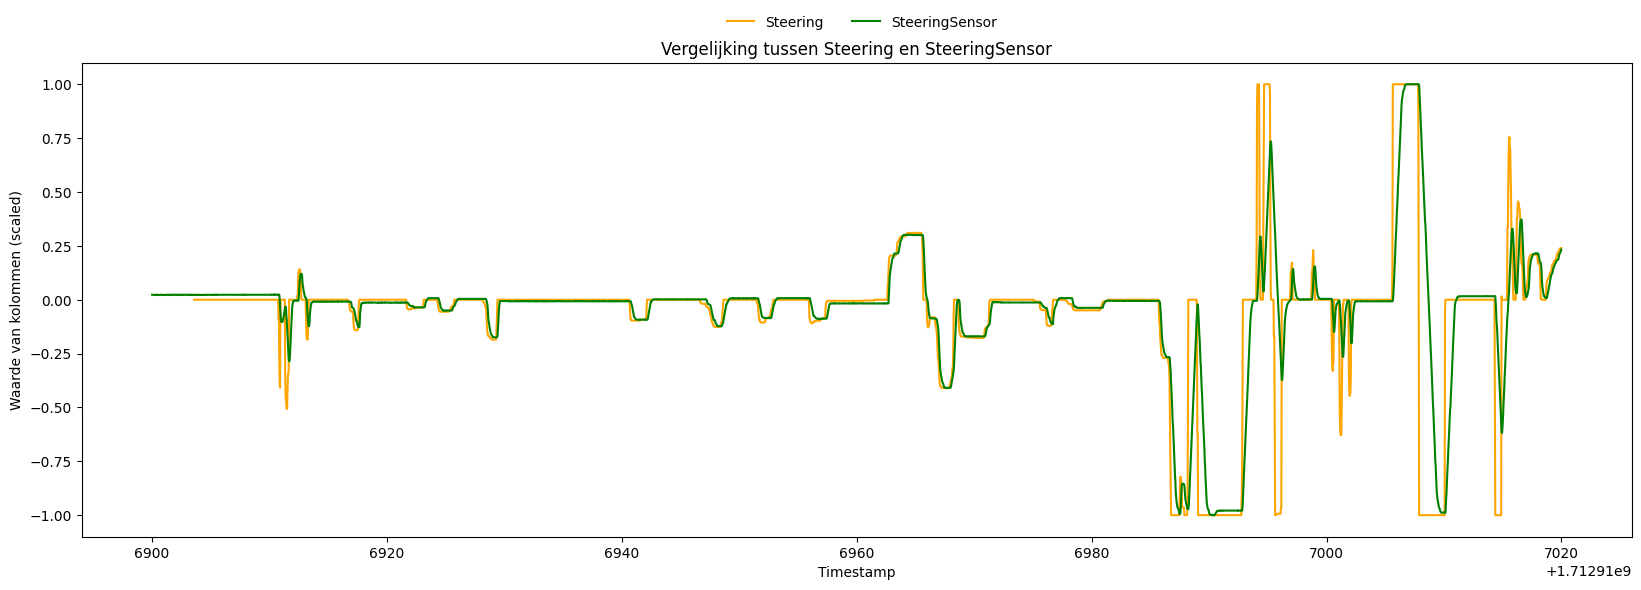

In [8]:
# Toepassen van de scaled_vergelijking functie
scaled_vergelijking(eda)

Zoals er te zien valt is er geen complete overlap tussen de steering kolom en de SteeringSensor kolom. Wat echter goed aan de grafiek is te zien is dat de steering sensor net iets later de data ontvangt dan dat er daadwerkelijke stuurinputs aanwezig zijn.

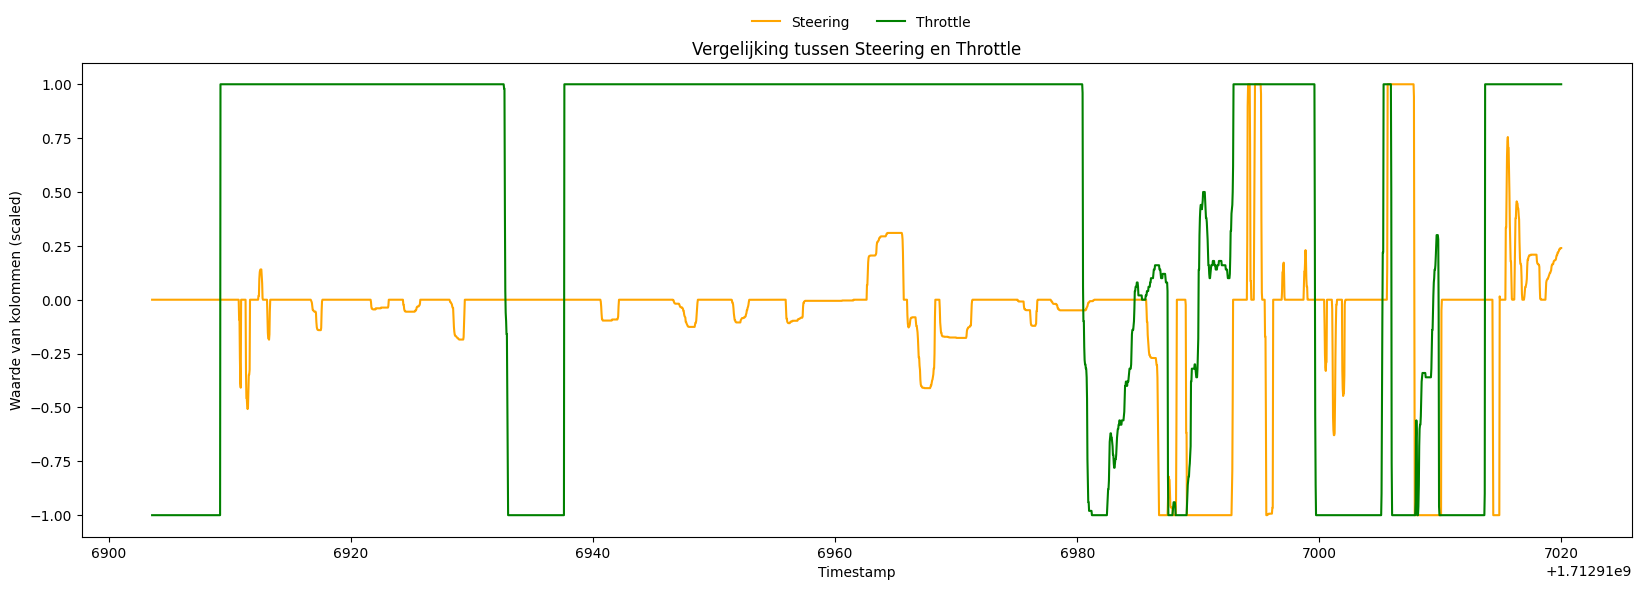

In [11]:
# Toepassen van de scaled_vergelijking functie
scaled_vergelijking(eda, kolom2="Throttle")

Bij een vergelijking tussen steering en throttle is het gemakkelijk te zien of er momenten zijn waar er te sterk moet worden ingestuurd, waarbij er geen mogelijkheid is om plankgas te blijven rijden.

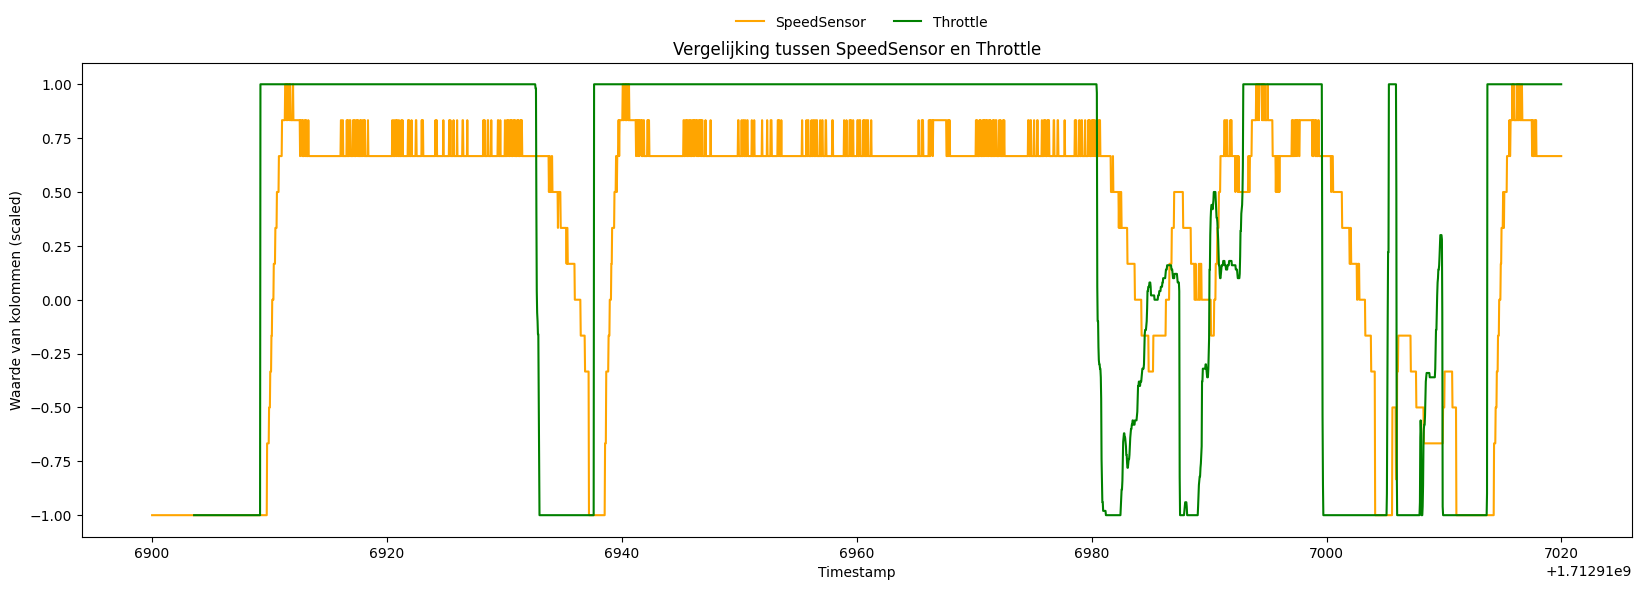

In [13]:
# Toepassen van de scaled_vergelijking functie
scaled_vergelijking(
    eda,
    kolom1="SpeedSensor",
    kolom2="Throttle"
)

Deze grafiek bouwt op de vorige grafiek, alleen pakt deze grafiek de waarden van SpeedSensor in plaats van steering. Wat bij de SpeedSensor erg opvalt is dat er na het optrekken een hogere piek is aan snelheid. Ook schommeld de snelheid lichtelijk als de kart op 'stabiele' snelheid rijdt.

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inspecteren van de CanBus berichten</div>
</div>
<br>
De kart functioneert door berichten te sturen via een CanBus. Een CanBus kan gezien worden als het zenuwstelsel van een autonoom voertuig, het stuurt de signalen door en reageert op de gegeven signalen. Door middel van een command prompt hebben we een text bestand gekregen met alle opgenomen CanBus berichten. Dit bestand hebben we vervolgens ingeladen in dit notebook voor verder onderzoek. Hierbij hebben we de volgende kolommen:<br><br>

|Kolom                |Mogelijke Waarden  |Uitleg
|--                   |--                 |--
|interface            |can0               |De interface naam van de CanBus. Deze is altijd can0.
|identifier           |440                |De identifier van de bericht. Elke identifier staat voor een ander orgaan van de kart.
|byte length          |[8]                |Deze waarde is altijd 8, aangezien de Canbus werkt met een systeem van 8 bytes.
|byte 1 t/m byte 8    |Tussen 00 en FF    |De hexadecimale letter/cijfer waarde. 00 staat voor 0 en FF voor 255.

In [29]:
# File path
file_path = 'CanBus.txt'

# Geven van de kolomnamen
column_names = [
    'interface', 'identifier', 'byte length',
    'byte 1', 'byte 2', 'byte 3', 'byte 4',
    'byte 5', 'byte 6', 'byte 7', 'byte 8'
    ]

# Inlezen van de data door pandas
df = pd.read_csv(file_path, sep=r'\s+', names=column_names, engine='python')

# Tonen eerste vijf regels
display(df.head())

# Tonen informatie data
display(df.info())

,interface,identifier,byte length,byte 1,byte 2,byte 3,byte 4,byte 5,byte 6,byte 7,byte 8
0,can0,440.0,[8],00,00,00,00,00,00,00,00
1,can0,100000.0,[8],04,FF,F6,7F,FD,00,03,B1
2,can0,720.0,[8],FF,F6,00,00,01,00,00,00
3,can0,440.0,[8],00,00,00,00,00,00,00,00
4,can0,100000.0,[8],04,FF,F6,10,00,00,02,45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202609 entries, 0 to 202608
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   interface    202609 non-null  object 
 1   identifier   202609 non-null  float64
 2   byte length  202609 non-null  object 
 3   byte 1       202609 non-null  object 
 4   byte 2       202609 non-null  object 
 5   byte 3       202609 non-null  object 
 6   byte 4       202609 non-null  object 
 7   byte 5       202609 non-null  object 
 8   byte 6       202609 non-null  object 
 9   byte 7       202609 non-null  object 
 10  byte 8       202609 non-null  object 
dtypes: float64(1), object(10)
memory usage: 17.0+ MB


None

Vanuit de wiki van de SDC hebben we de volgende informatie gekregen over de identifiers van de CanBus:
- id 110 zijn de remmen
- id 220 id het stuur
- id 330 is het gas
- id 440 is de snelheidssensor
- id 1E5 (10000) is de stuursensor
- id nummers beginnend met 7 (zoals 710 of 720) zijn voor feedback over de verschillende onderdelen.

De meest interessante identifiers zijn dus 110, 220, 330, 440, en 1E5. Op deze zal de dataset worden gefilterd.

In [30]:
# Lijst met interessante id
ids = [
    110.0, 220.0, 330.0,
    440.0, 100000.0
]

# Filteren van de data
can = df[df['identifier'].isin(ids)]

# Tonen eerste vijf regels
display(can.head())

,interface,identifier,byte length,byte 1,byte 2,byte 3,byte 4,byte 5,byte 6,byte 7,byte 8
0,can0,440.0,[8],00,00,00,00,00,00,00,00
1,can0,100000.0,[8],04,FF,F6,7F,FD,00,03,B1
3,can0,440.0,[8],00,00,00,00,00,00,00,00
4,can0,100000.0,[8],04,FF,F6,10,00,00,02,45
6,can0,100000.0,[8],04,FF,F6,30,02,00,02,67


Nu de data alleen nog de nodige informatie bevat, kunnen we dieper de data in kijken.

<Axes: xlabel='identifier', ylabel='count'>

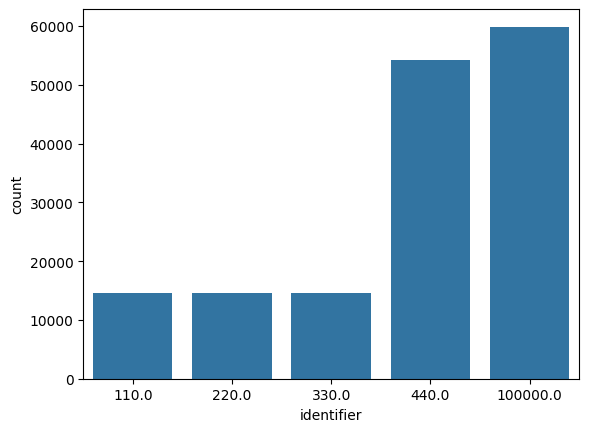

In [28]:
sns.countplot(
    data=can,
    x='identifier'
)

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inladen en bekijken van de afbeeldingen</div>
</div>
<br>
Naast het csv bestand zijn er ook erg veel foto's opgenomen in Lelystad. In dit gedeelte worden verschillende aspecten van de afbeeldingen bekeken.

In [18]:
image = 1715347319.3068223

image_overview(folder, image)

Bestand niet gevonden: Afbeelding niet gevonden in front directory.


UnboundLocalError: cannot access local variable 'img_left' where it is not associated with a value

In [19]:
data = data_selection(df, 1715347319, 1715347435)
len(data)

3472

In [20]:
images = load_images(data, f"D:/{folder}/front")

3019 / 3472 afbeeldingen zijn ingeladen.


In [ ]:
img_to_vid(images, "Testvid-30.mp4", data)

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Modellen en Computer Vision</div>
</div>
<br>
Ook wordt er gebruik gemaakt van verschillende modellen (of computer vision) om de kart succcesvol aan te sturen.

### Inladen van de afbeeldingen in sequences

In [4]:
# Aanmaken van de SEQ_LENGTH
SEQ_LENGTH = 30 * 5

# Aanmaken van de folder path
image_folder = 'D:/Recordings/recording 10-05-2024 15-21-55/front/'

# Inlezen van de data
#df = pd.read_csv('D:/Recordings/recording 10-05-2024 15-21-55/recording.csv', sep='|')

# Aanmaken van vulbare lijsten
X = []
y = []

In [22]:
len(data)

3472

In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from concurrent.futures import ThreadPoolExecutor
import gc

def get_image_as_array(filepath, target_size=(240, 424)):
    try:
        with Image.open(filepath) as img:
            img = img.resize(target_size)
            img_array = np.array(img)
            return img_array
    except IOError:
        print(f"Error opening file: {filepath}")
        return None

def load_images_and_steering(parent_folder, batch_size=1000):
    image_filepaths = []
    steering_data = []
    
    front_folder = os.path.join(parent_folder, 'front')
    csv_path = os.path.join(parent_folder, 'recording.csv')
    
    if not os.path.exists(csv_path):
        print(f"No recording.csv found in folder: {parent_folder}")
        return image_filepaths, steering_data
    
    df = pd.read_csv(csv_path, sep="|")
    df['Filename'] = df['Timestamp'].astype(str) + '.png'
    steering_dict = df.set_index('Filename')['Steering'].to_dict()
    
    batch_count = 0
    for file_name in sorted(os.listdir(front_folder)):
        if file_name.lower().endswith('.png'):
            file_path = os.path.join(front_folder, file_name)
            image_filepaths.append(file_path)
            base_name = os.path.basename(file_name)
            if base_name in steering_dict:
                steering_data.append(steering_dict[base_name])
            else:
                print(f"No steering data for file: {file_path}")

        batch_count += 1
        if batch_count >= batch_size:
            yield image_filepaths, steering_data
            image_filepaths = []
            steering_data = []
            batch_count = 0
    
    if batch_count > 0:
        yield image_filepaths, steering_data

def process_images(filepaths, max_workers=10):
    image_arrays = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = executor.map(get_image_as_array, filepaths)
        for result in results:
            if result is not None:
                image_arrays.append(result)
    return image_arrays

def split_into_sequences(image_arrays, steering_data, sequence_length=60, future_steps=5):
    sequences = []
    step_size = sequence_length // 2
    
    for i in range(0, len(image_arrays) - sequence_length - future_steps + 1, step_size):
        image_sequence = image_arrays[i:i+sequence_length]
        steering_sequence = steering_data[i+sequence_length:i+sequence_length+future_steps]
        if len(steering_sequence) == future_steps:
            sequences.append((image_sequence, np.mean(steering_sequence)))
    return sequences

def main(parent_folder):
    sequences = []
    for batch_filepaths, batch_steering in load_images_and_steering(parent_folder):
        image_arrays = process_images(batch_filepaths)
        batch_sequences = split_into_sequences(image_arrays, batch_steering)
        sequences.extend(batch_sequences)
        del image_arrays
        gc.collect()
    return sequences

parent_folder = "test_data/"
sequences = main(parent_folder)


No steering data for file: test_data/front\1715347317.1682475.png
No steering data for file: test_data/front\1715347318.6712399.png
No steering data for file: test_data/front\1715347318.7032247.png
No steering data for file: test_data/front\1715347318.9070807.png
No steering data for file: test_data/front\1715347319.3068225.png
No steering data for file: test_data/front\1715347319.4067597.png
No steering data for file: test_data/front\1715347319.4387367.png
No steering data for file: test_data/front\1715347319.5426633.png
No steering data for file: test_data/front\1715347319.9424043.png
No steering data for file: test_data/front\1715347319.9743881.png
No steering data for file: test_data/front\1715347320.0063663.png
No steering data for file: test_data/front\1715347320.3421621.png
No steering data for file: test_data/front\1715347320.4420981.png
No steering data for file: test_data/front\1715347320.4740763.png
No steering data for file: test_data/front\1715347321.0417147.png
No steerin

In [3]:
len(sequences)

191

In [4]:
average_length = np.mean([len(sequence[0]) for sequence in sequences])
print(f"Average length of arrays in sequences list: {average_length}")

Average length of arrays in sequences list: 60.0


In [5]:
shape_arrays = sequences[0][0][0].shape

In [6]:
shape_arrays

(424, 240, 3)

In [7]:
def preprocess_sequence_list(sequence_list, batch_size=100):
    X_batches = []
    y_batches = []
    e = 1

    for i in range(0, len(sequence_list), batch_size):
        X_list = []
        y_list = []
        
        for sequence in sequence_list[i:i+batch_size]:
            images, target = sequence
            
            normalized_images = [image.astype('float32') / 255 for image in images]
            image_array = np.array(normalized_images)
            
            image_array = np.expand_dims(image_array, axis=0)
            image_array = np.reshape(image_array, (1, 60, 424, 240, 3))
            
            X_list.append(image_array)
            y_list.append(target)
            
            del images
            del normalized_images
            del image_array
        
        X_batch = np.concatenate(X_list, axis=0)
        y_batch = np.array(y_list)
        
        X_batches.append(X_batch)
        y_batches.append(y_batch)
        
        del X_list
        del y_list

        print(f" -- Sequence {e} is loaded --")
        e += 1

    X = np.concatenate(X_batches, axis=0)
    y = np.concatenate(y_batches, axis=0)
    
    return X, y

X, y = preprocess_sequence_list(sequences, batch_size=32)
print("X shape:", X.shape)
print("y shape:", y.shape)


 -- Sequence 1 is loaded --
 -- Sequence 2 is loaded --
 -- Sequence 3 is loaded --
 -- Sequence 4 is loaded --
 -- Sequence 5 is loaded --
 -- Sequence 6 is loaded --
X shape: (191, 60, 424, 240, 3)
y shape: (191,)


In [8]:
batch_size = 32
num_epochs = 5

input_shape = (150, 424, 240, 3) # SEQ_Length, img_width, img_height, channels

import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape=(60, 424, 240, 3)):
    model = models.Sequential()
    
    model.add(layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling3D((2, 2, 2)))
    model.add(layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling3D((2, 2, 2)))
    model.add(layers.Flatten())

    model.add(layers.Reshape((model.output_shape[1], 1)))
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(layers.LSTM(64))

    model.add(layers.Dense(1))
    
    return model


model = create_model()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Users\crazy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 60, 424, 240,   │         2,624 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 30, 212, 120,   │             0 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 30, 212, 120,   │        55,360 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 15, 106, 60,    │             0 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6105600)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 6105600, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 6105600, 128)   │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,017 (679.75 KB)

 Trainable params: 174,017 (679.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5


: 